In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas


aust=pandas.read_excel('australia.xlsx')       #  Reading dataframe from csv or xlsx file into 'aust'

aust_ad=aust[aust['region']=='Adelaide '].copy()        #  Copying aust where region is 'Adelaide '

x=aust_ad[['smoke']]
y=aust_ad['unemp']

print('Done !')



Done !


In [2]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_n = LinearRegression()

lr.fit(x, y)






LinearRegression()

In [3]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=1)





In [4]:

from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy


scores = cross_val_score(lr, x, y, cv=3)        #  Returns array with 'cross. val. scrs.' for 'lr', 'x', 'y', 'cv'.

cv_scr=numpy.mean(scores)

cv_preds = cross_val_predict(lr, x, y, cv=3)

#scores
cv_scr
#cv_preds




0.8874341806680203

Best order: 1
0 1 -25.358225462563563 -25.358225462563563


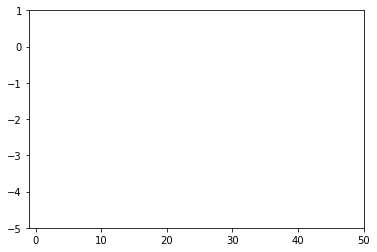

In [7]:
from sklearn.preprocessing import PolynomialFeatures

order=[i for i in range(1,100)]
R_squared=[]


for n in order:
    
    polyobj = PolynomialFeatures(degree = n)

   # x_train_pr = polyobj.fit_transform(x_train)
   # x_test_pr = polyobj.fit_transform(x_test)

    
    
    lr_n.fit(x_train_pr, y_train)

    R_squared.append(lr_n.score(x_test_pr, y_test))
                     
plt.plot(order, R_squared)
plt.xlim(-1,50)
plt.ylim(-5,1)

pos=0
for e in R_squared: 
    if e==max(R_squared): 
        print('Best order: '+str(order[pos])) 
        break
    else: pos+=1
        
print(pos,order[pos],max(R_squared), R_squared[pos])

                    
                     

In [8]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.1, normalize=True)

ridge_model.fit(x, y)

ypred = ridge_model.predict(x)

scr = ridge_model.score(x,y)

#ypred
scr



0.9355623468446834

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000], 'normalize':[True, False]}
RR = Ridge()

grid = GridSearchCV(RR, param, cv=4)

grid.fit(x_train_pr,y_train)

bestRR=grid.best_estimator_
results = grid.cv_results_

print(bestRR)
print(bestRR.score(x_train_pr,y_train))
#print(bestRR.score(x_test_pr, y_test))


params = results['params']
train_scores = results['std_test_score']
test_scores = results['mean_test_score']

#for i in range(len(params)):
 #   print(params[i], train_scores[i], test_scores[i])

#gs.best_estimator_
#gs.cv_results_




NameError: name 'x_train_pr' is not defined

In [5]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha = 0.1)

ridge_model.fit(x_train, y_train)

ypred = ridge_model.predict(x)

scr_tr = ridge_model.score(x_train, y_train)
scr_tst = ridge_model.score(x_test, y_test)
#ypred
scr_tr
scr_tst


0.8915576383401655